## 경기도, 1334713
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gg_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334713 entries, 0 to 1334712
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 1.0+ GB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334713 entries, 0 to 1334712
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   region_sub               1334713 non-null  object 
 1   apt_floor                1334713 non-null  int64  
 2   period_completed         1334713 non-null  int64  
 3   pyung                    1334713 non-null  float64
 4   price_per_pyung_present  1334713 non-null  float64
 5   kospi200                 1334713 non-null  float64
 6   kospi200construct        1334713 non-null  float64
 7   kosdaq                   1334713 non-null  float64
 8   dowjones                 1334713 non-null  float64
 9   shanghai                 1334713 non-null  float64
 10  exchange_rate            1334713 non-null  float64
 11  gold                     1334713 non-null  float64
 12  oil                      1334713 non-null  float64
 13  export                   1334713 non-null 

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

화성시       80042
남양주시      79319
부천시       76130
용인수지구     60349
용인기흥구     57669
성남분당구     56186
시흥시       51930
수원영통구     50342
안양동안구     49515
고양일산서구    49349
의정부시      48973
고양덕양구     48818
김포시       45833
파주시       42121
평택시       41139
군포시       38609
광명시       36736
수원권선구     33522
수원장안구     31670
안산단원구     29430
고양일산동구    28951
오산시       24537
양주시       23110
안양만안구     22191
안산상록구     21592
구리시       20495
의왕시       20069
광주시       19778
하남시       17671
수원팔달구     17373
안성시       17133
이천시       16361
용인처인구     16151
성남중원구     13866
동두천시      12217
성남수정구      9047
여주시        7254
포천시        7172
과천시        5031
양평군        3576
가평군        2238
연천군        1218
Name: region_sub, dtype: int64

In [7]:
drop_col_2 = {
    'ccb_pop', 'gw_pop'
}

preD.drop(columns=drop_col_2, inplace=True)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334713 entries, 0 to 1334712
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   region_sub               1334713 non-null  object 
 1   apt_floor                1334713 non-null  int64  
 2   period_completed         1334713 non-null  int64  
 3   pyung                    1334713 non-null  float64
 4   price_per_pyung_present  1334713 non-null  float64
 5   kospi200                 1334713 non-null  float64
 6   kospi200construct        1334713 non-null  float64
 7   kosdaq                   1334713 non-null  float64
 8   dowjones                 1334713 non-null  float64
 9   shanghai                 1334713 non-null  float64
 10  exchange_rate            1334713 non-null  float64
 11  gold                     1334713 non-null  float64
 12  oil                      1334713 non-null  float64
 13  export                   1334713 non-null 

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
gg_pop                     0.259062
gg_loan                    0.258955
dowjones                   0.253752
ccn_pop                    0.250863
cpi_living                 0.234743
kosdaq                     0.163865
exchange_rate              0.159317
apt_floor                  0.149539
kospi200                   0.149254
shanghai                   0.096089
gold                       0.091529
import                    -0.027810
export                    -0.038678
pyung                     -0.043664
period_completed          -0.061811
gg_re_ccsi                -0.082096
oil                       -0.161266
loan_interest_rate        -0.188819
kospi200construct         -0.224866
so_pop                    -0.258431
Name: price_per_pyung_present, dtype: float64

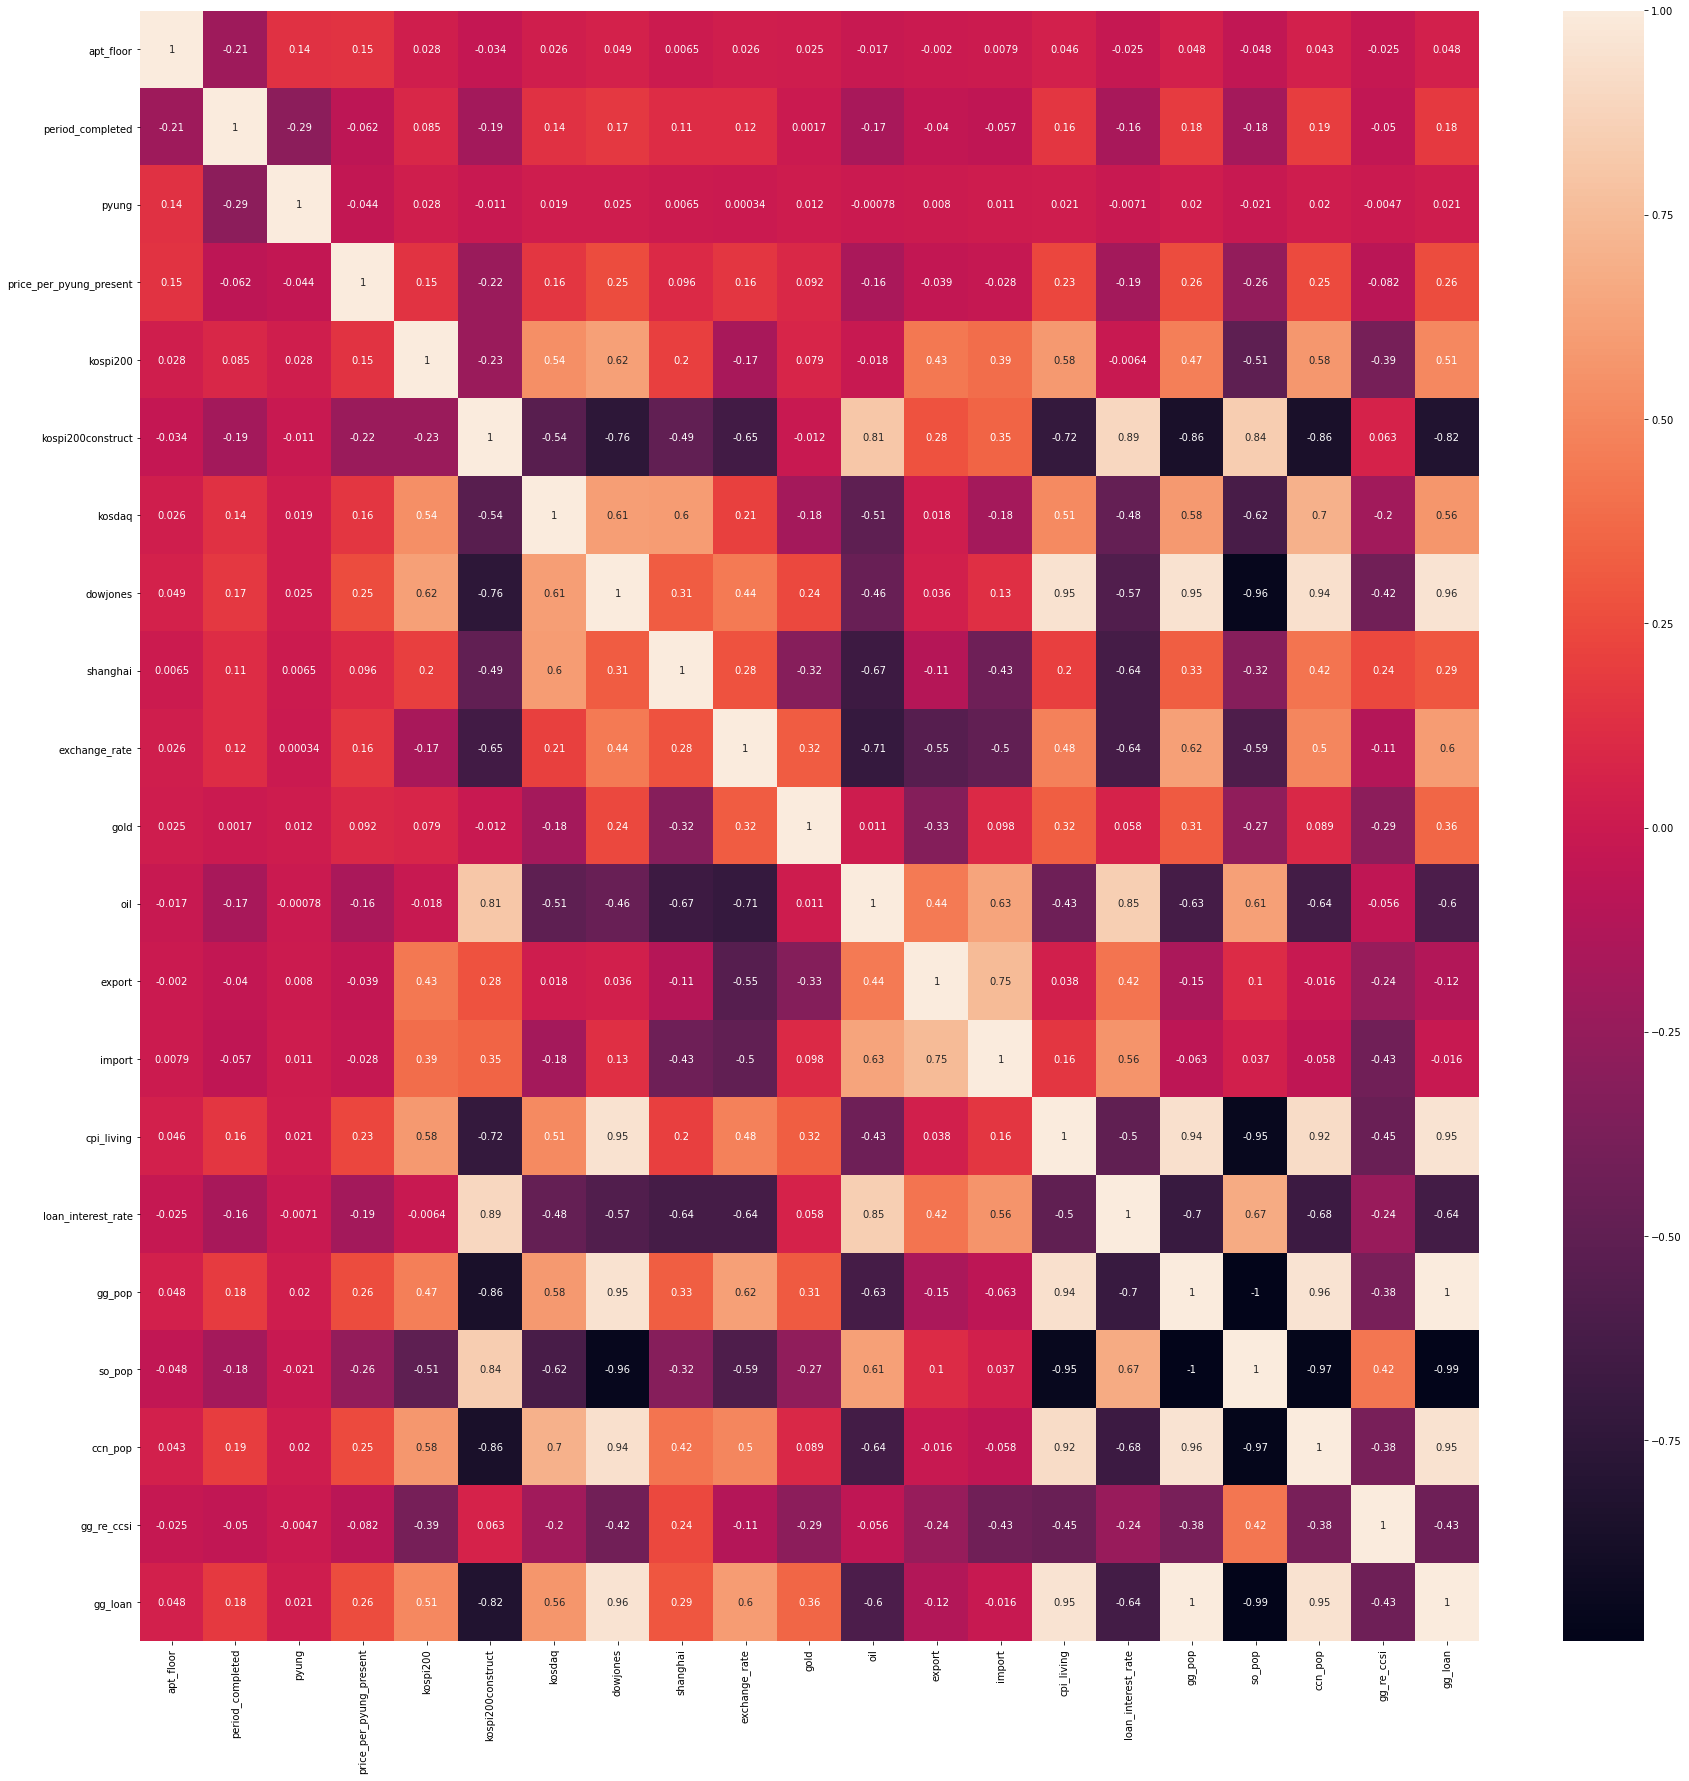

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.334713e+06
mean     1.345375e+07
std      5.954393e+06
min      3.136480e+05
25%      9.539856e+06
50%      1.226840e+07
75%      1.578242e+07
max      1.066129e+08
Name: price_per_pyung_present, dtype: float64


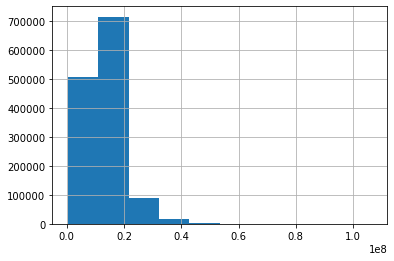

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 3.136480e+05  # min
print(preD['price_cat'].describe())

count    1.334713e+06
mean     4.289441e+01
std      1.898432e+01
min      1.000000e+00
25%      3.041580e+01
50%      3.911518e+01
75%      5.031888e+01
max      3.399125e+02
Name: price_cat, dtype: float64


In [12]:
def calc_price_categorize(D):

    if D['price_cat'] < 3.041580e+01 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 3.911518e+01 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 5.031888e+01 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

4.0    333681
1.0    333678
2.0    333678
3.0    333676
Name: price_cat, dtype: int64

In [13]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gg_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334713 entries, 0 to 1334712
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   region_sub               1334713 non-null  object 
 1   apt_floor                1334713 non-null  int64  
 2   period_completed         1334713 non-null  int64  
 3   pyung                    1334713 non-null  float64
 4   price_per_pyung_present  1334713 non-null  float64
 5   kospi200                 1334713 non-null  float64
 6   kospi200construct        1334713 non-null  float64
 7   kosdaq                   1334713 non-null  float64
 8   dowjones                 1334713 non-null  float64
 9   shanghai                 1334713 non-null  float64
 10  exchange_rate            1334713 non-null  float64
 11  gold                     1334713 non-null  float64
 12  oil                      1334713 non-null  float64
 13  export                   1334713 non-null 

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

sample = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=37)
for sample1_idx, sample2_idx in sample.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    sample1_set = readD.loc[sample1_idx]
    sample2_set = readD.loc[sample2_idx]

sample1_set.reset_index(drop=True, inplace=True)
sample2_set.reset_index(drop=True, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(sample1_set, sample1_set["price_cat"]):
    train_set = sample1_set.loc[train_idx]
    test_set = sample1_set.loc[test_idx]

len(sample1_set), len(train_set), len(test_set)

(400413, 280289, 120124)

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

4.0    0.250003
1.0    0.249999
3.0    0.249999
2.0    0.249999
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

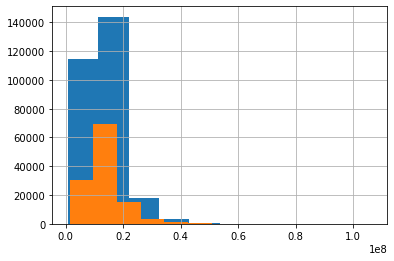

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
x_test.head()
print(x_test.columns)

Index(['region_sub', 'apt_floor', 'period_completed', 'pyung', 'kospi200',
       'kospi200construct', 'kosdaq', 'dowjones', 'shanghai', 'exchange_rate',
       'gold', 'oil', 'export', 'import', 'cpi_living', 'loan_interest_rate',
       'gg_pop', 'so_pop', 'ccn_pop', 'gg_re_ccsi', 'gg_loan'],
      dtype='object')


In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [11]:
x_train_nor[1, :]


array([ 1.61363862,  0.49171326, -0.67671067, -0.9807046 , -0.2450119 ,
        0.43460119, -0.5827382 ,  0.2291741 ,  0.3409292 , -0.60905616,
       -1.18119363, -0.54860527, -1.61785718, -0.66870927, -0.52152636,
       -0.27383291,  0.25636508, -0.15705626,  0.12128782, -0.40450336,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [1100],
              'gbr__max_depth': [8]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=2)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.906101819041301
테스트 세트 점수:  0.9200926263665765
최적의 매개변수: {'gbr__max_depth': 8, 'gbr__n_estimators': 1100}


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  1690629.5367019093
grid mae:  1141037.387502965


In [14]:
grid.cv_results_

{'mean_fit_time': array([1496.58376348]),
 'std_fit_time': array([2.96254957]),
 'mean_score_time': array([4.90141129]),
 'std_score_time': array([0.00447464]),
 'param_gbr__max_depth': masked_array(data=[8],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[1100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 8, 'gbr__n_estimators': 1100}],
 'split0_test_score': array([0.90511861]),
 'split1_test_score': array([0.90708503]),
 'mean_test_score': array([0.90610182]),
 'std_test_score': array([0.00098321]),
 'rank_test_score': array([1])}

In [15]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [16]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/gg_region.pkl']

In [19]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  1690629.5367019093


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gg_region'
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')

pred_x_col = [
    'region_sub', 'apt_floor', 'period_completed', 'pyung', 'kospi200',
    'kospi200construct', 'kosdaq', 'dowjones', 'shanghai', 'exchange_rate',
    'gold', 'oil', 'export', 'import', 'cpi_living', 'loan_interest_rate',
    'gg_pop', 'so_pop', 'ccn_pop', 'gg_re_ccsi', 'gg_loan'
]

test = readD.tail(1)
test = test.drop(['price_per_pyung_present', 'price_cat'], axis=1)
test['region_sub'] = '양평군'
test['period_completed'] = 0
test['pyung'] = 25.72
test

,region_sub,apt_floor,period_completed,pyung,kospi200,kospi200construct,kosdaq,dowjones,shanghai,exchange_rate,...,oil,export,import,cpi_living,loan_interest_rate,gg_pop,so_pop,ccn_pop,gg_re_ccsi,gg_loan
1334712,양평군,12,0,25.72,280.09,189.47,737.97,25812.88,2984.67,1199.0,...,39.84,39229801,35597740,104.88,2.67,13351891,9715429,2120692,123.8,275491.3


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [6]:
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(test)
test_pred

array([14759975.35753955])

In [ ]:
# 양평휴먼빌리버파크어반
# 경기도 양평군 양평읍 창대리
# 분양가: 380300000
# 층수: 12층
# 전용면적: 84.86
# 평수: 25.72
# 평당가격: 14786159
# 예측가격  14759975

## 모델 프로토 타입

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gg_region'
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')

test = readD.tail(1)
test = test.drop(['price_per_pyung_present', 'price_cat'], axis=1)
test['region_sub'] = readD['region_sub'].value_counts().index[0]
test['apt_floor'] = 12
test['period_completed'] = 0
test['pyung'] = 25.71
test.to_dict('records')

[{'region_sub': '화성시',
  'apt_floor': 12,
  'period_completed': 0,
  'pyung': 25.71,
  'kospi200': 280.09,
  'kospi200construct': 189.47,
  'kosdaq': 737.97,
  'dowjones': 25812.88,
  'shanghai': 2984.67,
  'exchange_rate': 1199.0,
  'gold': 1793.6,
  'oil': 39.84,
  'export': 39229801,
  'import': 35597740,
  'cpi_living': 104.88,
  'loan_interest_rate': 2.67,
  'gg_pop': 13351891,
  'so_pop': 9715429,
  'ccn_pop': 2120692,
  'gg_re_ccsi': 123.8,
  'gg_loan': 275491.3}]

In [8]:

default_gg = [{
    'region_sub': '화성시', 'apt_floor': 12, 'period_completed': 0, 'pyung': 25.72,
    'kospi200': 280.09, 'kospi200construct': 189.47, 'kosdaq': 737.97,
    'dowjones': 25812.88, 'shanghai': 2984.67, 'exchange_rate': 1199.0, 'gold': 1793.6,
    'oil': 39.84, 'export': 39229801, 'import': 35597740, 'cpi_living': 104.88, 'loan_interest_rate': 2.67,
    'gg_pop': 13351891, 'so_pop': 9715429, 'ccn_pop': 2120692, 'gg_re_ccsi': 123.8, 'gg_loan': 275491.3
}]

predD = pd.DataFrame.from_records(default_gg)


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values


import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(predD)
test_pred

array([19606097.33571727])